# Digit Classification Using Neural Networks

The MNIST dataset comprises 60,000 training examples and 10,000 test examples of the handwritten digits 0–9, formatted as 28x28-pixel monochrome images.

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
inputData=input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random as ran

# Looking under the hood

In [3]:
def trainSize(number):
    print('Total Images in Training Dataset= '+ str(inputData.train.images.shape))
    xTrain= inputData.train.images[:number,:] # selecting 'number' number of rows from all the data we have as our training data
    print('xTrain Examples Loaded=' + str(xTrain.shape))
    yTrain= inputData.train.labels[:number,:]
    print('yTrain Examples Loaded=' +str(yTrain.shape))
    return xTrain, yTrain

In [4]:
def testSize(number):
    print('Total Images in Testing Dataset= '+ str(inputData.test.images.shape))
    xTest= inputData.test.images[:number,:] # selecting 'number' number of rows from all the data we have as our test data
    print('xTest Examples Loaded=' + str(xTest.shape))
    yTest= inputData.test.labels[:number,:]
    print('yTest Examples Loaded=' +str(yTest.shape))
    return xTest, yTest

In [5]:
def displayDigit(number):
    print(yTrain[number])
    label= yTrain[number].argmax(axis=0) # interprets the one-hot encoded label
    image= xTrain[number].reshape([28,28]) # interprets the image vector of size 1x784
    plt.title('Example:%d Label:%d' %(number,label))
    plt.imshow(image, cmap=plt.get_cmap("gray_r"))
    plt.show()

# Understanding the Input 

In [6]:
xTrain, yTrain = trainSize(55000)

Total Images in Training Dataset= (55000, 784)
xTrain Examples Loaded=(55000, 784)
yTrain Examples Loaded=(55000, 10)


# xTrain Data

<img src="IMAGES/1.png">

# yTrain Data

<img src="IMAGES/2.png">

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


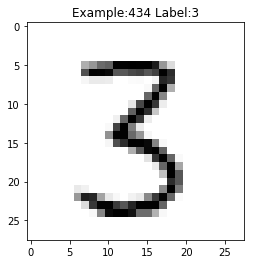

In [7]:
displayDigit(ran.randint(0,xTrain.shape[0]))

# Defining the Network Architecture

<center><img src="IMAGES/softmax-regression-scalargraph.png" style="width:600px;height:304px;"></center>

Softmax Function: https://en.wikipedia.org/wiki/Softmax_function

In [8]:
import tensorflow as tf

TensorFlow builds the network architecture which you feed with inputs and run during **sessions**.

In [9]:
sess= tf.Session()

Creating placeholders that are the exact size of the input. Placeholders are used to feed the network with input data.

In [10]:
x=tf.placeholder(tf.float32, shape=[None,784]) #None here means any multiples of 1x784 vectors

In [11]:
ybar= tf.placeholder(tf.float32, shape=[None,10])

In [12]:
W= tf.Variable(tf.zeros([784,10]))
b= tf.Variable(tf.zeros([10])) 

In [13]:
y= tf.nn.softmax(tf.matmul(x,W)+ b) # Multinomial logistic Regression with softmax activation function

# Understanding the Output

xTrain, yTrain = trainSize(5)

sess.run(tf.global_variables_initializer())

print(sess.run(y,feed_dict={x: xTrain}))

# Defining the Loss Function

In [14]:
crossEntropy= tf.reduce_mean(-tf.reduce_sum(ybar*tf.log(y), reduction_indices=[1])) # reduce_sum Computes the sum of elements across dimensions of a tensor.

<img src="IMAGES/Parabola-antipodera.gif" />

# Training the Network

In [15]:
xTrain, yTrain = trainSize(5500)
xTest, yTest = testSize(10000)
learningRate = 0.1
TrainSteps = 5000

Total Images in Training Dataset= (55000, 784)
xTrain Examples Loaded=(5500, 784)
yTrain Examples Loaded=(5500, 10)
Total Images in Testing Dataset= (10000, 784)
xTest Examples Loaded=(10000, 784)
yTest Examples Loaded=(10000, 10)


In [16]:
initialize= tf.global_variables_initializer()
sess.run(initialize)

In [17]:
training= tf.train.GradientDescentOptimizer(learningRate).minimize(crossEntropy)

In [18]:
correctPrediction= tf.equal(tf.argmax(y,1),tf.argmax(ybar,1))

In [19]:
accuracy= tf.reduce_mean(tf.cast(correctPrediction,tf.float32))

In [20]:
for i in range(TrainSteps+1):
    sess.run(training, feed_dict={x: xTrain, ybar: yTrain})
    if i%100 == 0:
        print('Training Step:' + str(i) + '  Accuracy =  ' + str(sess.run(accuracy, feed_dict={x: xTest, ybar: yTest})) 
              + '  Loss = ' + str(sess.run(crossEntropy, {x: xTrain, ybar: yTrain})))

Training Step:0  Accuracy =  0.5988  Loss = 2.1882
Training Step:100  Accuracy =  0.8647  Loss = 0.580297
Training Step:200  Accuracy =  0.879  Loss = 0.459822
Training Step:300  Accuracy =  0.8866  Loss = 0.408572
Training Step:400  Accuracy =  0.8904  Loss = 0.378081
Training Step:500  Accuracy =  0.8943  Loss = 0.356976
Training Step:600  Accuracy =  0.8974  Loss = 0.34105
Training Step:700  Accuracy =  0.8984  Loss = 0.32835
Training Step:800  Accuracy =  0.9  Loss = 0.317827
Training Step:900  Accuracy =  0.9005  Loss = 0.308862
Training Step:1000  Accuracy =  0.9009  Loss = 0.301065
Training Step:1100  Accuracy =  0.9023  Loss = 0.29417
Training Step:1200  Accuracy =  0.9029  Loss = 0.287995
Training Step:1300  Accuracy =  0.9033  Loss = 0.282406
Training Step:1400  Accuracy =  0.9039  Loss = 0.277303
Training Step:1500  Accuracy =  0.9048  Loss = 0.27261
Training Step:1600  Accuracy =  0.9057  Loss = 0.268267
Training Step:1700  Accuracy =  0.9062  Loss = 0.264226
Training Step: